In [59]:
import numpy as np 
import pandas as pd
df=pd.read_csv('/kaggle/input/irisdata/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [60]:
df.drop(['Id'],axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [61]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [62]:
df.shape

(150, 5)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


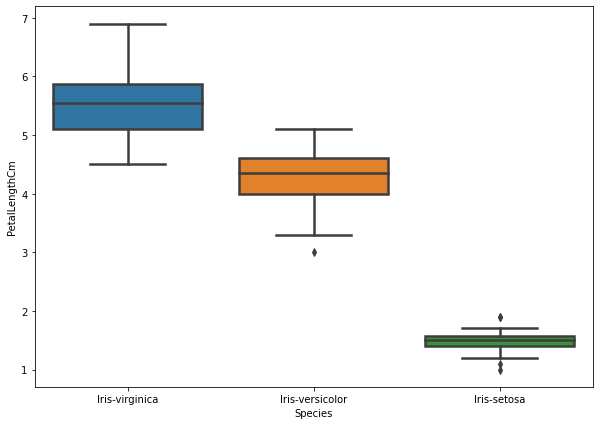

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='Species',y='PetalLengthCm',data=df,order=['Iris-virginica','Iris-versicolor','Iris-setosa'],linewidth=2.5,orient='v',dodge=False)

In [65]:
y=df['Species']
df.drop(['Species'],axis=1,inplace=True)

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
c=cross_val_score(DecisionTreeClassifier(), df, y, cv=5)
print(np.mean(c))

0.9533333333333334


In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, y,shuffle=True, test_size=0.20, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
param={'criterion':['gini', 'entropy'], 'max_depth':np.linspace(1, 32, 31),'min_samples_split':np.linspace(0.1, 1.0, 10, endpoint=True),'min_samples_leaf':np.linspace(0.1, 0.5, 5, endpoint=True),'max_features':['auto', 'sqrt', 'log2',None]}
clf=GridSearchCV(DecisionTreeClassifier(),param,cv=5,scoring='accuracy')
clf.fit(x_train,y_train)

In [ ]:
clf.best_estimator_

In [ ]:
clf.best_estimator_.get_params()

In [ ]:
clf.best_estimator_.score(x_test,y_test)

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, x_test, y_test)

In [ ]:
clf.best_estimator_.score(x_train,y_train)

In [ ]:
from sklearn.metrics import classification_report
y_pred=clf.best_estimator_.predict(x_test)
print(classification_report(y_test, y_pred))

In [ ]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf.best_estimator_,filled=True, rounded=True, special_characters=True,out_file=None)
graph